<a href="https://colab.research.google.com/github/ekansh1811/cnn/blob/main/main_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [38]:
batch_size = 256
num_classes = 10
learning_rate = 0.01
num_epochs = 20

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [40]:
all_transform = transforms.Compose([transforms.Resize((32,32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.4914,0.4822,0.4465],
                                                         std=[0.2023,0.1994,0.2010])
                                    ])

In [41]:
train_dataset = datasets.CIFAR10(root='./data',
                                 train = True,
                                 transform = all_transform,
                                 download = True)

test_dataset = datasets.CIFAR10(root = './data',
                                train = False,
                                transform = all_transform,
                                download = True)

Files already downloaded and verified
Files already downloaded and verified


In [42]:
train_loader = DataLoader(dataset = train_dataset,
                          batch_size = batch_size,
                          shuffle = True)

test_loader = DataLoader(dataset = test_dataset,
                         batch_size = batch_size,
                         shuffle = True)

In [52]:
class ConvNeuralNet(nn.Module):
  def __init__(self, num_classes):
    super(ConvNeuralNet, self).__init__()
    self.conv_l1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
    self.conv_l2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
    self.max_pool1 = nn.MaxPool2d(kernel_size=2,stride=2)

    self.conv_l3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
    self.conv_l4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(1600,128)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(128,num_classes)

  def forward(self, x):
    out = self.conv_l1(x)
    out = self.conv_l2(out)
    out = self.max_pool1(out)

    out = self.conv_l3(out)
    out = self.conv_l4(out)
    out = self.max_pool2(out)

    out = out.reshape(out.size(0), -1)

    out = self.fc1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    return out

In [53]:
model = ConvNeuralNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.005, momentum = 0.9)
total_step = len(train_loader)

Epoch [1], loss:1.4450
accuracy =  46.489999999999995



Epoch [2], loss:1.3296
accuracy =  53.52



Epoch [3], loss:1.1704
accuracy =  59.25



Epoch [4], loss:0.9905
accuracy =  61.0



Epoch [5], loss:0.6824
accuracy =  64.92999999999999



Epoch [6], loss:1.0416
accuracy =  66.89



Epoch [7], loss:0.7938
accuracy =  68.62



Epoch [8], loss:0.6312
accuracy =  69.24



Epoch [9], loss:0.7534
accuracy =  69.42



Epoch [10], loss:0.8213
accuracy =  70.19



Epoch [11], loss:0.5566
accuracy =  69.76



Epoch [12], loss:0.6237
accuracy =  69.78



Epoch [13], loss:0.6910
accuracy =  69.69999999999999



Epoch [14], loss:0.6189
accuracy =  70.22



Epoch [15], loss:0.4092
accuracy =  70.39999999999999



Epoch [16], loss:0.5823
accuracy =  69.24



Epoch [17], loss:0.5250
accuracy =  69.69



Epoch [18], loss:0.4918
accuracy =  68.51



Epoch [19], loss:0.4237
accuracy =  69.74000000000001



Epoch [20], loss:0.4834
accuracy =  69.57



Epoch [21], loss:0.4329
accuracy =  69.87



Epoc

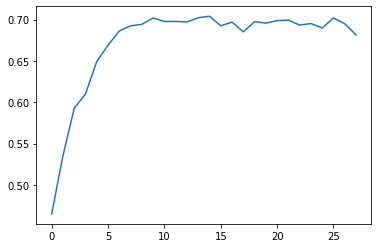

In [54]:
acc=[0,0]
k = 0
j = 0
while True:
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i/195==1:
      j+=1
      with torch.no_grad():
        correct = 0
        samples = 0
        for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _,predicted = torch.max(outputs.data,1)
          samples+=labels.size(0)
          correct+= (predicted == labels).sum().item()
      print('Epoch [{}], loss:{:.4f}'.format(j,loss.item()))
      print('accuracy = ',100*(correct/samples))
      print('\n\n')
      accuracy = correct/samples
      acc+=[accuracy]
      if acc[len(acc)-1]<acc[len(acc)-2] and acc[len(acc)-2]<acc[len(acc)-3]:
        k+=1
        break
  if k==1:
    break

plt.plot(acc[2:])


In [57]:
with torch.no_grad():
  correct = 0
  samples = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    samples+=labels.size(0)
    correct+= (predicted == labels).sum().item()
print('accuracy = ',100*(correct/samples))

accuracy =  68.15
